# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [105]:
import pandas as pd
loan_df = pd.read_csv('loan_data.csv')
loan_df.head(5)

person_age person_gender person_education  person_income  person_emp_exp  \
0          71          male        Associate   46817.176426               3   
1          34          male      High School   79093.494008              17   
2          80          male        Associate   67819.614431              20   
3          40        female        Associate   49599.861220               0   
4          43          male        Doctorate   99833.900180               8   

  person_home_ownership     loan_amnt loan_intent  loan_int_rate  \
0                  RENT  11567.737650     MEDICAL      10.351469   
1                   OWN   9519.674498     MEDICAL      11.168902   
2                   OWN  16226.604002    PERSONAL      12.293112   
3                  RENT  15641.221708     VENTURE      10.327926   
4                   OWN  12727.942517   EDUCATION       9.338069   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             0.247083                           5    806.869094   
1             0.120360                           1    604.330171   
2             0.239261                          11    685.933579   
3             0.315348                          14    629.190150   
4             0.127491                          16    638.298168   

  previous_loan_defaults_on_file  loan_status  
0                             No            0  
1                             No            0  
2                             No            0  
3                             No            0  
4                             No            1

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [107]:
pd.crosstab(loan_df['person_age'], loan_df['loan_status'], normalize='index')*100

loan_status           0          1
person_age                        
20            80.269058  19.730942
21            83.597122  16.402878
22            83.043478  16.956522
23            80.230880  19.769120
24            80.434783  19.565217
...                 ...        ...
81           100.000000   0.000000
82           100.000000   0.000000
83           100.000000   0.000000
84           100.000000   0.000000
85           100.000000   0.000000

[66 rows x 2 columns]

## 1)Age of the person


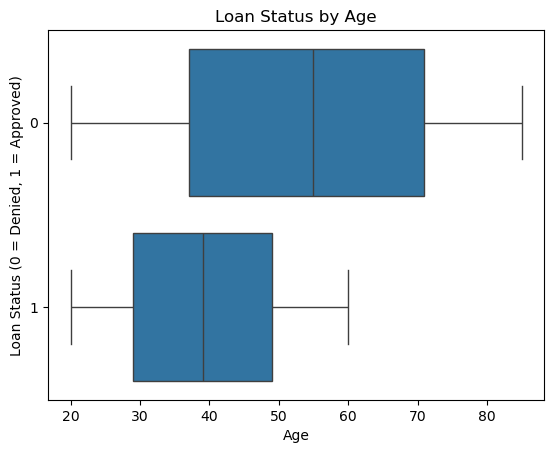

In [108]:
sns.boxplot(x='person_age', y='loan_status', data=loan_df, orient='h')
plt.title('Loan Status by Age')
plt.xlabel('Age')
plt.ylabel('Loan Status (0 = Denied, 1 = Approved)')
plt.show()

In [109]:
loan_df['person_age'].describe()

count    45000.000000
mean        52.440422
std         19.087414
min         20.000000
25%         36.000000
50%         52.000000
75%         69.000000
max         85.000000
Name: person_age, dtype: float64

## 2)Gender of the person

In [110]:
pd.crosstab(loan_df['person_gender'], loan_df['loan_status'])

loan_status        0     1
person_gender             
female         15934  1975
male           24173  2918

In [111]:
pd.crosstab(loan_df['person_gender'], loan_df['loan_status'], normalize=True)*100

loan_status            0         1
person_gender                     
female         35.408889  4.388889
male           53.717778  6.484444

In [112]:
pd.crosstab(loan_df['person_gender'], loan_df['loan_status'], normalize='index')*100

loan_status            0          1
person_gender                      
female         88.972025  11.027975
male           89.228895  10.771105

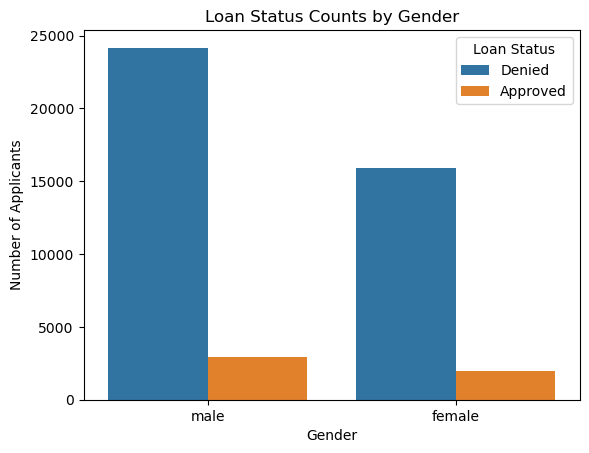

In [113]:
sns.countplot(x='person_gender', hue='loan_status', data=loan_df)
plt.title('Loan Status Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.show()

## 3)Highest education level

In [114]:

pd.crosstab(loan_df['person_education'], loan_df['loan_status'])

loan_status          0     1
person_education            
Associate         8016   922
Bachelor          7963   988
Doctorate         8068   992
High School       8112   990
Master            7948  1001

In [115]:
pd.crosstab(loan_df['person_education'], loan_df['loan_status'], normalize=True)*100

loan_status               0         1
person_education                     
Associate         17.813333  2.048889
Bachelor          17.695556  2.195556
Doctorate         17.928889  2.204444
High School       18.026667  2.200000
Master            17.662222  2.224444

In [116]:
ct = pd.crosstab(loan_df['person_education'], loan_df['loan_status'])    
survival_pct = (ct[1] / ct.sum(axis=1) * 100).round(1)
print(survival_pct.reindex(['Associate','Bachelor','Doctorate','High School','Master']))

person_education
Associate      10.3
Bachelor       11.0
Doctorate      10.9
High School    10.9
Master         11.2
dtype: float64


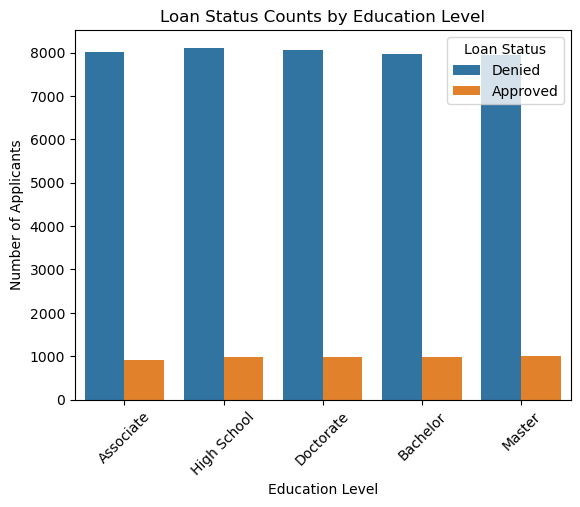

In [117]:
sns.countplot(
    x='person_education',
    hue='loan_status',
    data=loan_df
)
plt.title('Loan Status Counts by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.xticks(rotation=45)
plt.show()

## 4)Annual income

In [118]:
loan_df['person_income'] = loan_df['person_income'].fillna(loan_df['person_income'].median())
loan_df['Income50Cat'] = np.where(loan_df['person_income'] < 50_000, '< $50k', '≥ $50k')
pd.crosstab(loan_df['Income50Cat'], loan_df['loan_status'])

loan_status      0     1
Income50Cat             
< $50k       13135   520
≥ $50k       26972  4373

In [119]:
pd.crosstab(loan_df['Income50Cat'], loan_df['loan_status'], normalize='index') * 100

loan_status          0          1
Income50Cat                      
< $50k       96.191871   3.808129
≥ $50k       86.048812  13.951188

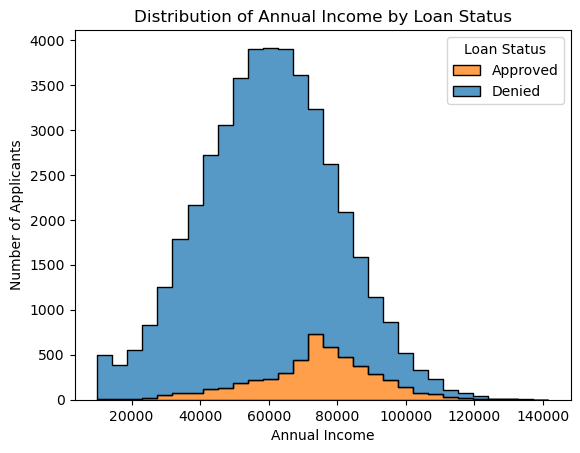

In [120]:
sns.histplot(
    x='person_income', data=loan_df, hue='loan_status',
    element='step', multiple='stack', bins=30
)

plt.title('Distribution of Annual Income by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Approved', 'Denied'])
plt.show()

## 5)Credit score of the person

In [121]:
loan_df['credit_score'] = loan_df['credit_score'].fillna(loan_df['credit_score'].median())
loan_df['Score700Cat'] = np.where(loan_df['credit_score'] < 700, '< 700', '≥ 700')
pd.crosstab(loan_df['Score700Cat'], loan_df['loan_status'])

loan_status      0     1
Score700Cat             
< 700        25900  1695
≥ 700        14207  3198

In [122]:
pd.crosstab(loan_df['Score700Cat'], loan_df['loan_status'], normalize='index') * 100

loan_status          0          1
Score700Cat                      
< 700        93.857583   6.142417
≥ 700        81.625970  18.374030

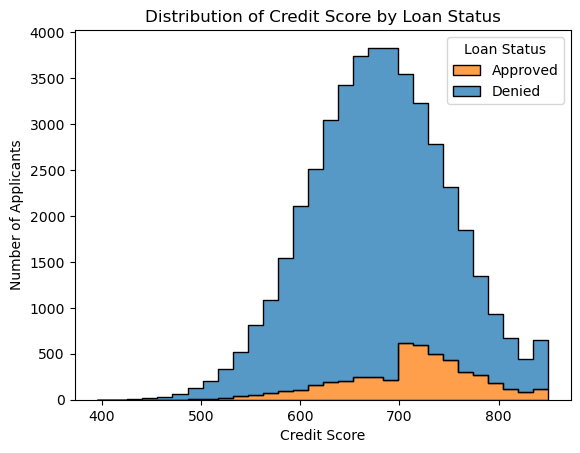

In [123]:
sns.histplot(
    x='credit_score', data=loan_df, hue='loan_status',
    element='step', multiple='stack', bins=30
)

plt.title('Distribution of Credit Score by Loan Status')
plt.xlabel('Credit Score')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Approved', 'Denied'])
plt.show()

## 6)Indicator of previous loan defaults

In [124]:
pd.crosstab(loan_df['previous_loan_defaults_on_file'], loan_df['loan_status'])

loan_status                         0     1
previous_loan_defaults_on_file             
No                              35556  4893
Yes                              4551     0

In [125]:
pd.crosstab(loan_df['previous_loan_defaults_on_file'], loan_df['loan_status'], normalize=True)*100

loan_status                             0          1
previous_loan_defaults_on_file                      
No                              79.013333  10.873333
Yes                             10.113333   0.000000

In [126]:
pd.crosstab(loan_df['previous_loan_defaults_on_file'], loan_df['loan_status'], normalize='index')*100

loan_status                              0          1
previous_loan_defaults_on_file                       
No                               87.903286  12.096714
Yes                             100.000000   0.000000

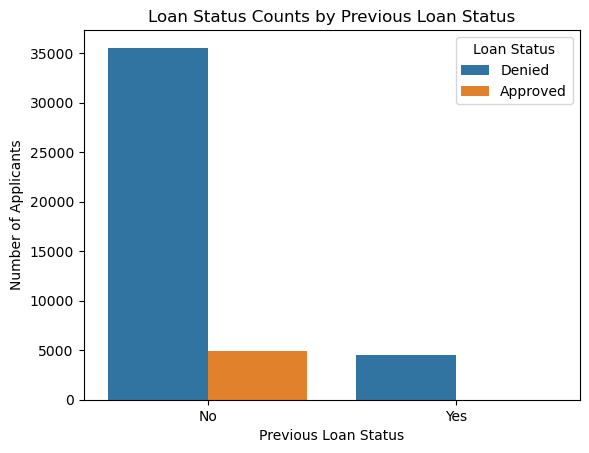

In [127]:
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=loan_df)
plt.title('Loan Status Counts by Previous Loan Status')
plt.xlabel('Previous Loan Status')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.show()

## 7)Purpose of the loan

In [128]:
pd.crosstab(loan_df['loan_intent'], loan_df['loan_status'])

loan_status           0     1
loan_intent                  
DEBTCONSOLIDATION  7038   502
EDUCATION          6062  1397
HOMEIMPROVEMENT    6018  1448
MEDICAL            7085   493
PERSONAL           6867   544
VENTURE            7037   509

In [129]:
pd.crosstab(loan_df['loan_intent'], loan_df['loan_status'], normalize=True)*100

loan_status                0         1
loan_intent                           
DEBTCONSOLIDATION  15.640000  1.115556
EDUCATION          13.471111  3.104444
HOMEIMPROVEMENT    13.373333  3.217778
MEDICAL            15.744444  1.095556
PERSONAL           15.260000  1.208889
VENTURE            15.637778  1.131111

In [130]:
ct = pd.crosstab(loan_df['loan_intent'], loan_df['loan_status'])    
loan_status_pct = (ct[1] / ct.sum(axis=1) * 100).round(1)
print(loan_status_pct.reindex(['DEBTCONSOLIDATION','EDUCATION','HOMEIMPROVEMENT','MEDICAL','PERSONAL','VENTURE']))

loan_intent
DEBTCONSOLIDATION     6.7
EDUCATION            18.7
HOMEIMPROVEMENT      19.4
MEDICAL               6.5
PERSONAL              7.3
VENTURE               6.7
dtype: float64


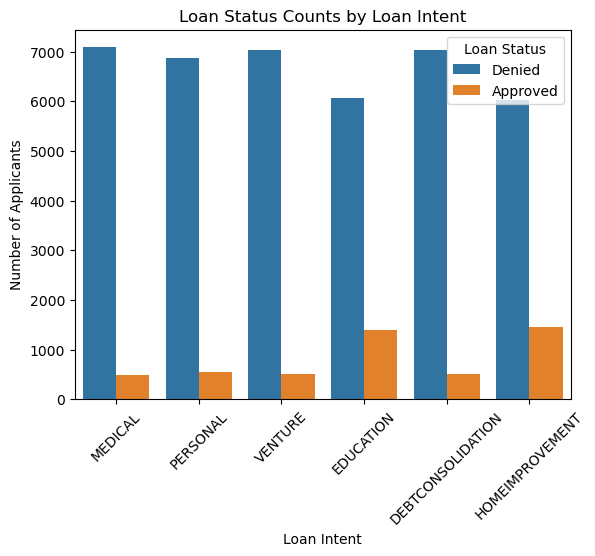

In [131]:
sns.countplot(
    x='loan_intent',
    hue='loan_status',
    data=loan_df
)
plt.title('Loan Status Counts by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Status', labels=['Denied', 'Approved'])
plt.xticks(rotation=45)
plt.show()

Applicants with an annual income of at least 50k have roughly 10% higher chances of loan approval compared to those earning less than 50k. Additionally, the age data suggests that younger applicants (ages 30–50) are more likely to be approved than older applicants (ages 40–70). A similar trend appears with credit score, where individuals with stronger credit histories show significantly higher approval rates.

When examining gender differences, there appears to be no substantial disparity between male and female applicants. The same applies to education level and loan purpose, which show minimal influence on approval outcomes. The indicator of previous loan defaults also provides limited predictive value, likely because the ratio between “Yes” and “No” responses is too imbalanced to draw meaningful conclusions.

Based on these observations, the financial institution is unlikely to face potential legal issues, since age alone is not the sole factor influencing approval decisions and other protected characteristics (such as gender or education) do not appear to bias the model’s outcomes.

